# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

t_app_train = os.path.join(dir_data, 'application_test.csv')
app_test = pd.read_csv(t_app_train)

app_train.shape

FileNotFoundError: [Errno 2] File b'./data/application_train.csv' does not exist: b'./data/application_train.csv'

In [71]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])         
            
for col in app_test:
    if app_test[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_test[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_test[col] = le.fit_transform(app_test[col])      
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [73]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_test['YEARS_BIRTH'] = app_test['DAYS_BIRTH']/365

In [6]:
app_train.corr()['TARGET'].nlargest(5)

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
Name: TARGET, dtype: float64

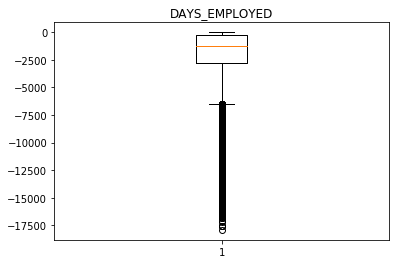

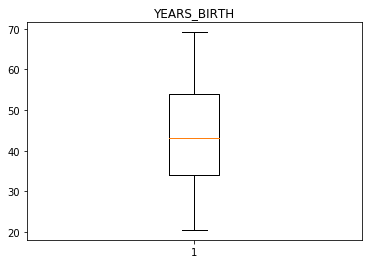

ModeResult(mode=array([2], dtype=int64), count=array([229484]))
2


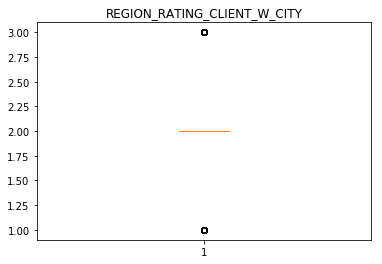

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [74]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].fillna(0)
app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'].fillna(0)
plt.title('DAYS_EMPLOYED')
plt.boxplot(app_train['DAYS_EMPLOYED'])
plt.show()


app_train['YEARS_BIRTH'] = app_train['YEARS_BIRTH'].fillna(0)
app_test['YEARS_BIRTH'] = app_test['YEARS_BIRTH'].fillna(0)
plt.title('YEARS_BIRTH')
plt.boxplot(app_train['YEARS_BIRTH'])
plt.show()

from scipy.stats import mode

mode_get = mode(app_train[~app_train['REGION_RATING_CLIENT_W_CITY'].isnull()]['REGION_RATING_CLIENT_W_CITY'])
print(mode_get)
print(mode_get[0][0])   # 將值拿出來

app_train.loc[app_train['REGION_RATING_CLIENT_W_CITY'].isnull(), 'REGION_RATING_CLIENT_W_CITY'] = mode_get[0][0]


plt.title('REGION_RATING_CLIENT_W_CITY')
plt.boxplot(app_train['REGION_RATING_CLIENT_W_CITY'].fillna(0))
plt.show()

app_train['REGION_RATING_CLIENT_W_CITY'].value_counts()

In [75]:
app_train["equal_width_age"] = pd.cut(app_train["YEARS_BIRTH"], bins=[0,10,20,30,40,50,100])
app_train["equal_width_age_i"] = pd.cut(app_train["YEARS_BIRTH"], bins=[0,10,20,30,40,50,100], labels = [1,2,3,4,5,6])

app_train["equal_width_age"].value_counts() # 每個 bin 的資料筆數是一樣的
app_train["equal_width_age_i"] = app_train["equal_width_age_i"].astype('int64')
app_train["equal_width_age"].dtypes

CategoricalDtype(categories=[(0, 10], (10, 20], (20, 30], (30, 40], (40, 50], (50, 100]],
              ordered=True)

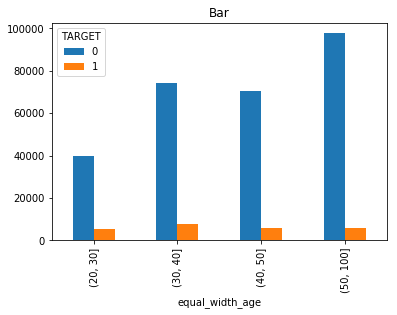

In [76]:
gdf = app_train.groupby(['TARGET','equal_width_age']).size()
gdf.name = 'values'
gdf = gdf.reset_index()
gdf = gdf.pivot(index='equal_width_age', columns='TARGET', values='values')
gdf.plot(kind='bar',title='Bar',figsize=(6,4))


In [77]:
train_Y = app_train['TARGET']
df_train = app_train.drop(['TARGET'] , axis=1)
df_test = app_test
df = pd.concat([df_train,df_test])
df.head()

C:\Users\johnma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,equal_width_age,equal_width_age_i
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,WEDNESDAY,0.9722,0.9722,0.9722,25.920548,0.6192,0.6243,0.6341,"(20, 30]",3.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MONDAY,0.9851,0.9851,0.9851,45.931507,0.7960,0.7987,0.8040,"(40, 50]",5.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MONDAY,NaN,NaN,NaN,52.180822,NaN,NaN,NaN,"(50, 100]",6.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,WEDNESDAY,NaN,NaN,NaN,52.068493,NaN,NaN,NaN,"(50, 100]",6.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,THURSDAY,NaN,NaN,NaN,54.608219,NaN,NaN,NaN,"(50, 100]",6.0


In [78]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df_train.dtypes, df_train.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df_train[num_features]
train_num = train_Y.shape[0]
df.head()

107 Numeric Features : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,equal_width_age_i
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637.0,-3648.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,3
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188.0,-1186.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,5
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225.0,-4260.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,6
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039.0,-9833.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,6
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,-3038.0,-4311.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,6


In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 做線性迴歸
train_X = df[:train_num][['DAYS_EMPLOYED']]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 做線性迴歸
train_X = df[:train_num][['REGION_RATING_CLIENT_W_CITY']]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 做線性迴歸
train_X = df[:train_num][['YEARS_BIRTH']]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 做線性迴歸
train_X = df[:train_num][['equal_width_age_i']]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

0.0020934651441805842
0.0036790262153181263
0.006091416170660979
0.005636164079715211
